In [2]:
#import packages 
import pandas as pd 
import numpy as np 
import yfinance as yf 
import scipy.stats as sps
import matplotlib.pyplot as plt

In [3]:
#Draw data 
ticker = '1211.HK'
start= '2014-07-19'
end= '2024-07-19'

In [5]:
price= np.array(yf.download(ticker, start,end)['Adj Close'])

[*********************100%%**********************]  1 of 1 completed


In [8]:
#calc log returns 
returns= np.log(price[1:]/price[:-1])
#sort returns
returns= np.sort(returns)
print(returns)

[-0.34017232 -0.16140366 -0.13085514 ...  0.1484201   0.14989102
  0.1637764 ]


In [9]:
#construct empirical distribution
edf= np.arange(1, len(returns)+1)/len(returns)

In [14]:
#normalised 
mean= np.average(returns)
sd= np.std(returns)
nomarl_cdf= sps.norm.cdf(returns, mean,sd)

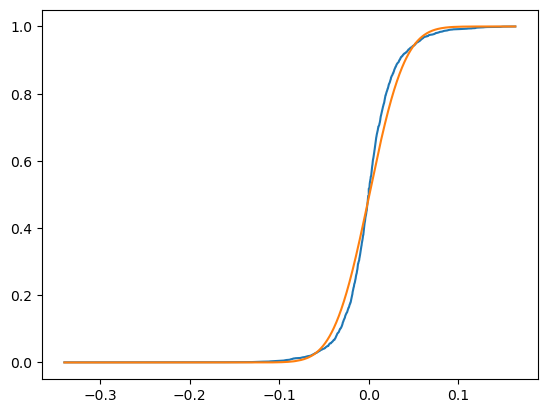

In [17]:
plt.plot(returns, edf)
plt.plot(returns, nomarl_cdf)

In [20]:
#conduct Kolmogorov–Smirnov test
p_value= np.exp(-max(abs(edf-nomarl_cdf))**2*len(returns))
if p_value<0.01:
    print('normal dist does not fit the data: p_value'+str(round(p_value, 4)))
else:
    print('normal dist does fit the data: p_value'+str(rodun(p_value,4)))

normal dist does not fit the data: p_value0.0
